In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import pathlib
from google.colab import drive
from sklearn.metrics import confusion_matrix,roc_curve,ConfusionMatrixDisplay

Data link - https://drive.google.com/drive/folders/1M6yrWYoC50Xs0rPI_Pc7cMx2SuH6i1UL?usp=share_link

In [3]:
#Reading data from google drive
drive.mount('/content/gdrive',force_remount= True)
img_dir = '/content/gdrive/MyDrive/Vehicle/data'
data_dir = pathlib.Path(img_dir)

Mounted at /content/gdrive


In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
ds = ds.map(process)

Found 3033 files belonging to 2 classes.


In [5]:
#Splitting data into training and validation set (resizing image into 64x64)
img_height,img_width=64,64
batchsize=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batchsize)

Found 3033 files belonging to 2 classes.
Using 2427 files for training.


In [6]:
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batchsize)

Found 3033 files belonging to 2 classes.
Using 606 files for validation.


In [7]:
#Model building
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# Adding a flatting layer
model.add(Flatten())
# Adding layers
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

In [8]:
# model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                1

In [9]:
#Model training and validation
epoch_num = 15
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch_num)

Epoch 1/15
76/76 [==============================] - 26s 305ms/step - loss: 1.3689 - accuracy: 0.7309 - val_loss: 0.2665 - val_accuracy: 0.9191
Epoch 2/15
76/76 [==============================] - 23s 301ms/step - loss: 0.2599 - accuracy: 0.9081 - val_loss: 0.1829 - val_accuracy: 0.9439
Epoch 3/15
76/76 [==============================] - 24s 307ms/step - loss: 0.1266 - accuracy: 0.9596 - val_loss: 0.0813 - val_accuracy: 0.9769
Epoch 4/15
76/76 [==============================] - 23s 303ms/step - loss: 0.1221 - accuracy: 0.9592 - val_loss: 0.1348 - val_accuracy: 0.9637
Epoch 5/15
76/76 [==============================] - 22s 282ms/step - loss: 0.1244 - accuracy: 0.9621 - val_loss: 0.1323 - val_accuracy: 0.9736
Epoch 6/15
76/76 [==============================] - 21s 278ms/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.0470 - val_accuracy: 0.9901
Epoch 7/15
76/76 [==============================] - 22s 279ms/step - loss: 0.0724 - accuracy: 0.9810 - val_loss: 0.0528 - val_accuracy: 0.9802

In [11]:
import tensorflow as tf
y_true = []
y_pred = []
for x,y in val_ds:
  # y = tf.argmax(y,axis=1)
  y_true.append(y)
  y_pred.append(tf.argmax(model.predict(x),axis = 1))
  
y_pred = tf.concat(y_pred, axis=0)
y_true = tf.concat(y_true, axis=0)

1/1 [==============================] - 0s 123ms/step


Text(0.5, 1.0, 'ROC')

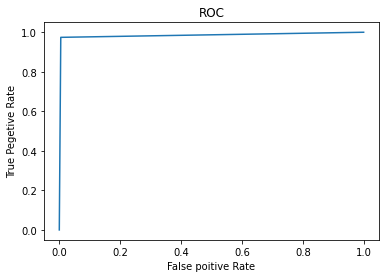

In [12]:
#ROC Plot
fpr,tpr,thresholds = roc_curve(y_true,y_pred)
plt.plot(fpr,tpr)
plt.xlabel("False poitive Rate")
plt.ylabel("True Pegetive Rate")
plt.title("ROC")

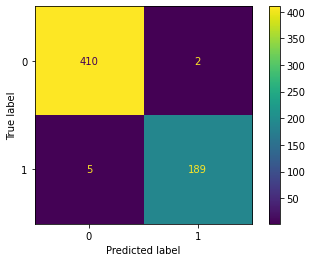

In [13]:
#Confusion metric
cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

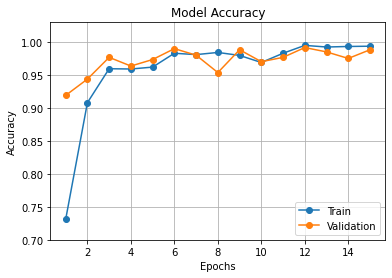

In [17]:
#Plotting training and validation accuracy
x = np.linspace(1,epoch_num,epoch_num)
fig1 = plt.gcf()
plt.plot(x,history.history['accuracy'],marker = 'o')
plt.plot(x,history.history['val_accuracy'],marker = 'o')
plt.axis(ymin=0.7,ymax=1.03)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

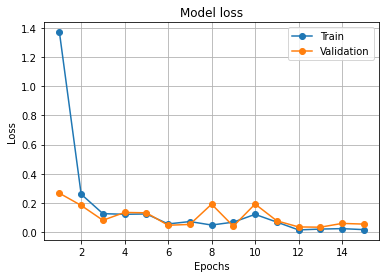

In [18]:
#Plotting training and validation loss
x = np.linspace(1,epoch_num,epoch_num)
fig1 = plt.gcf()
plt.plot(x,history.history['loss'],marker = 'o')
plt.plot(x,history.history['val_loss'],marker = 'o')
# plt.axis(ymin=0.9,ymax=1.03)
plt.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [34]:
#Reading NORMAL chest X-ray
import cv2
image=cv2.imread('/content/gdrive/MyDrive/Vehicle/data/non-vehicles/extra26.png')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [35]:
#Predicting the image class
pred=model.predict(image)
pred

1/1 [==============================] - 0s 22ms/step


array([[0.99729747, 0.00270253]], dtype=float32)

Non-vehicle:0
Vehicle:1

The given image is not a vehicle


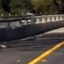

In [36]:
from IPython.display import Image
output_class=np.argmax(pred)
if output_class == 0:
  print("The given image is not a vehicle")
elif output_class == 1:
  print("The given image is a vehicle")
else:
  pass
Image(filename ='/content/gdrive/MyDrive/Vehicle/data/non-vehicles/extra26.png')